Primero vamos a llamar las librerias para tener nuestro espacio de trabajo

In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

Cargamos nuestro conjunto de datos y el tamaño de nuestras imagenes 

In [2]:
dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

Queremos ver nuestras imagenes de entrenamiento con las que estamos trabajando, construir unas bases que me permitan reconstruir o explicar cada una de las imagenes de mi base de datos


Train Images:


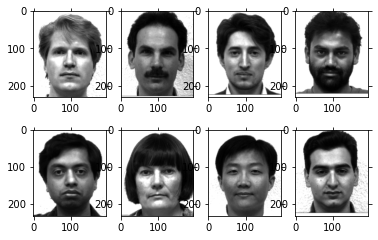

Test Images:


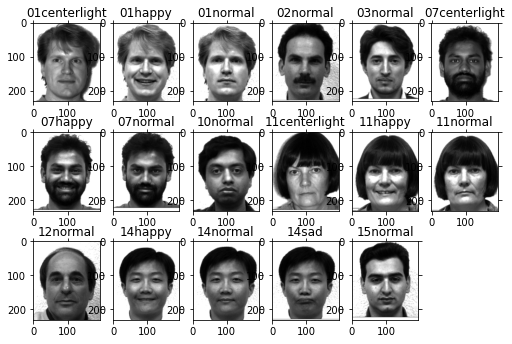

In [10]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Cara promedio
Buscamos la media de las caras y quiero que eso me de una cara promedio

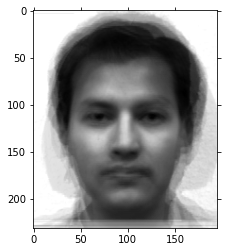

In [11]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalizacion de las caras

In [6]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Mostrar caras normalizadas

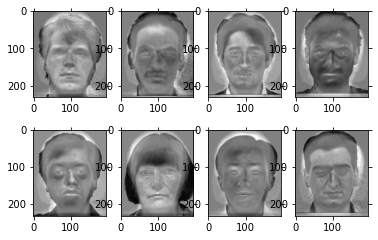

In [7]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Matriz de Covarianza
La siguiente es la matriz de covarianza asociada a los datos que guarda la informacion de nuestras caras

In [12]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


Ahora calculamos tanto los valores como los vectores propios que mas adelante usaremos como pesos

In [14]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.24216786 -0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [-0.2320557   0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [-0.15104702 -0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [-0.41563654  0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [ 0.05114387 -0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [ 0.73015769  0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [ 0.14350419 -0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [-0.36823436  0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[1.11554951e+03 4.85892625e+02 1.01686336e-13 1.22955135e+02
 2.95284929e+02 1.76427142e+02 2.32097712e+02 2.28059153e+02]


In [15]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Encontramos la varianza de cada uno de los componentes principales

Cumulative proportion of variance explained vector: 
[0.41996902 0.60289218 0.7140576  0.80143503 0.88729207 0.95371129
 1.         1.        ]


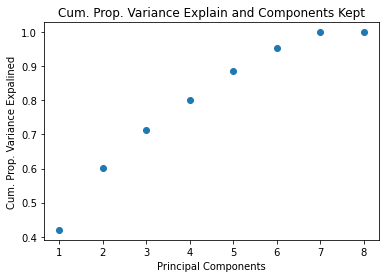

In [16]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

### Se elige el número necesario de componentes principales

In [18]:
reduced_data = np.array(eigvectors_sort[:7]).transpose()

Ahora tratamos de encontrar los datos proyectados. Esto formará el espacio propio.

In [19]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

Graficas de los eigenfaces

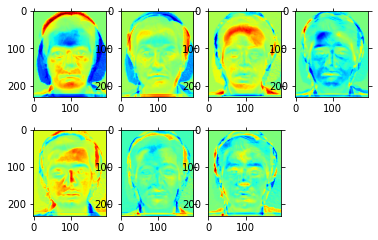

In [21]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Encontrar pesos para cada imagen de entrenamiento

In [22]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[ 8.48287612e+07, -5.81765456e+07,  4.32101930e+07,
        -7.76647463e+07, -3.06341089e+07,  3.58272786e+07,
        -3.53176153e+07],
       [-8.90553605e+07,  4.26457404e+07,  6.83431225e+07,
         2.56112699e+07, -1.89660204e+07, -3.27984752e+07,
         1.63052275e+07],
       [-6.49888673e+07, -1.91766896e+07, -5.08976401e+07,
        -6.15416348e+07, -1.02271740e+07, -2.29160969e+07,
         4.87793668e+06],
       [-1.63772788e+08,  3.62801041e+07, -4.07933003e+07,
         4.85649446e+07, -2.11225024e+07, -2.23707416e+06,
        -1.88350738e+07],
       [ 2.50823074e+07, -7.92886248e+07,  6.20549912e+06,
         3.76311039e+07,  5.70068630e+07, -2.62025963e+07,
        -3.84041861e+06],
       [ 3.03507468e+08,  1.07059520e+08, -2.15641534e+07,
         4.34624113e+07,  1.37673278e+07, -2.06872576e+07,
         1.02386688e+07],
       [ 5.73401449e+07, -8.29527225e+07, -1.50118335e+07,
         2.00947251e+07, -2.61070419e+07,  2.69240539e+07,
         2.3016248

### Ahora reconocemos mi cara que es un nuevo dato

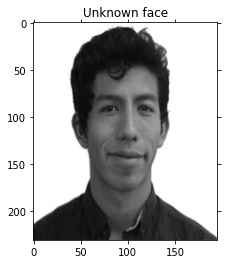

In [26]:
unknown_face        = plt.imread('integ.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalización cara nueva

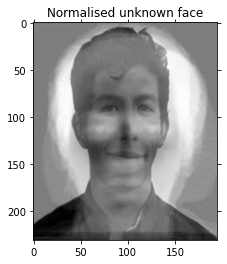

In [27]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Pesos de cara desconocida
Proyectando el vector normalizado en el espacio propio, para encontrar los pesos:

In [28]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-1.50121352e+08, -1.33417321e+08, -1.96212277e+07, -1.82118384e+08,
       -1.21485677e+07,  1.12372385e+08, -5.70470006e+07])

Encontrar $$min|W-Wdesconocido|$$

In [29]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[2.87043750e+08 3.34840557e+08 2.40742167e+08 3.11965773e+08
 3.30756005e+08 5.80863625e+08 3.16867033e+08 2.61068667e+08]


240742167.20499277

### Reconocimiento de todas las imágenes de prueba

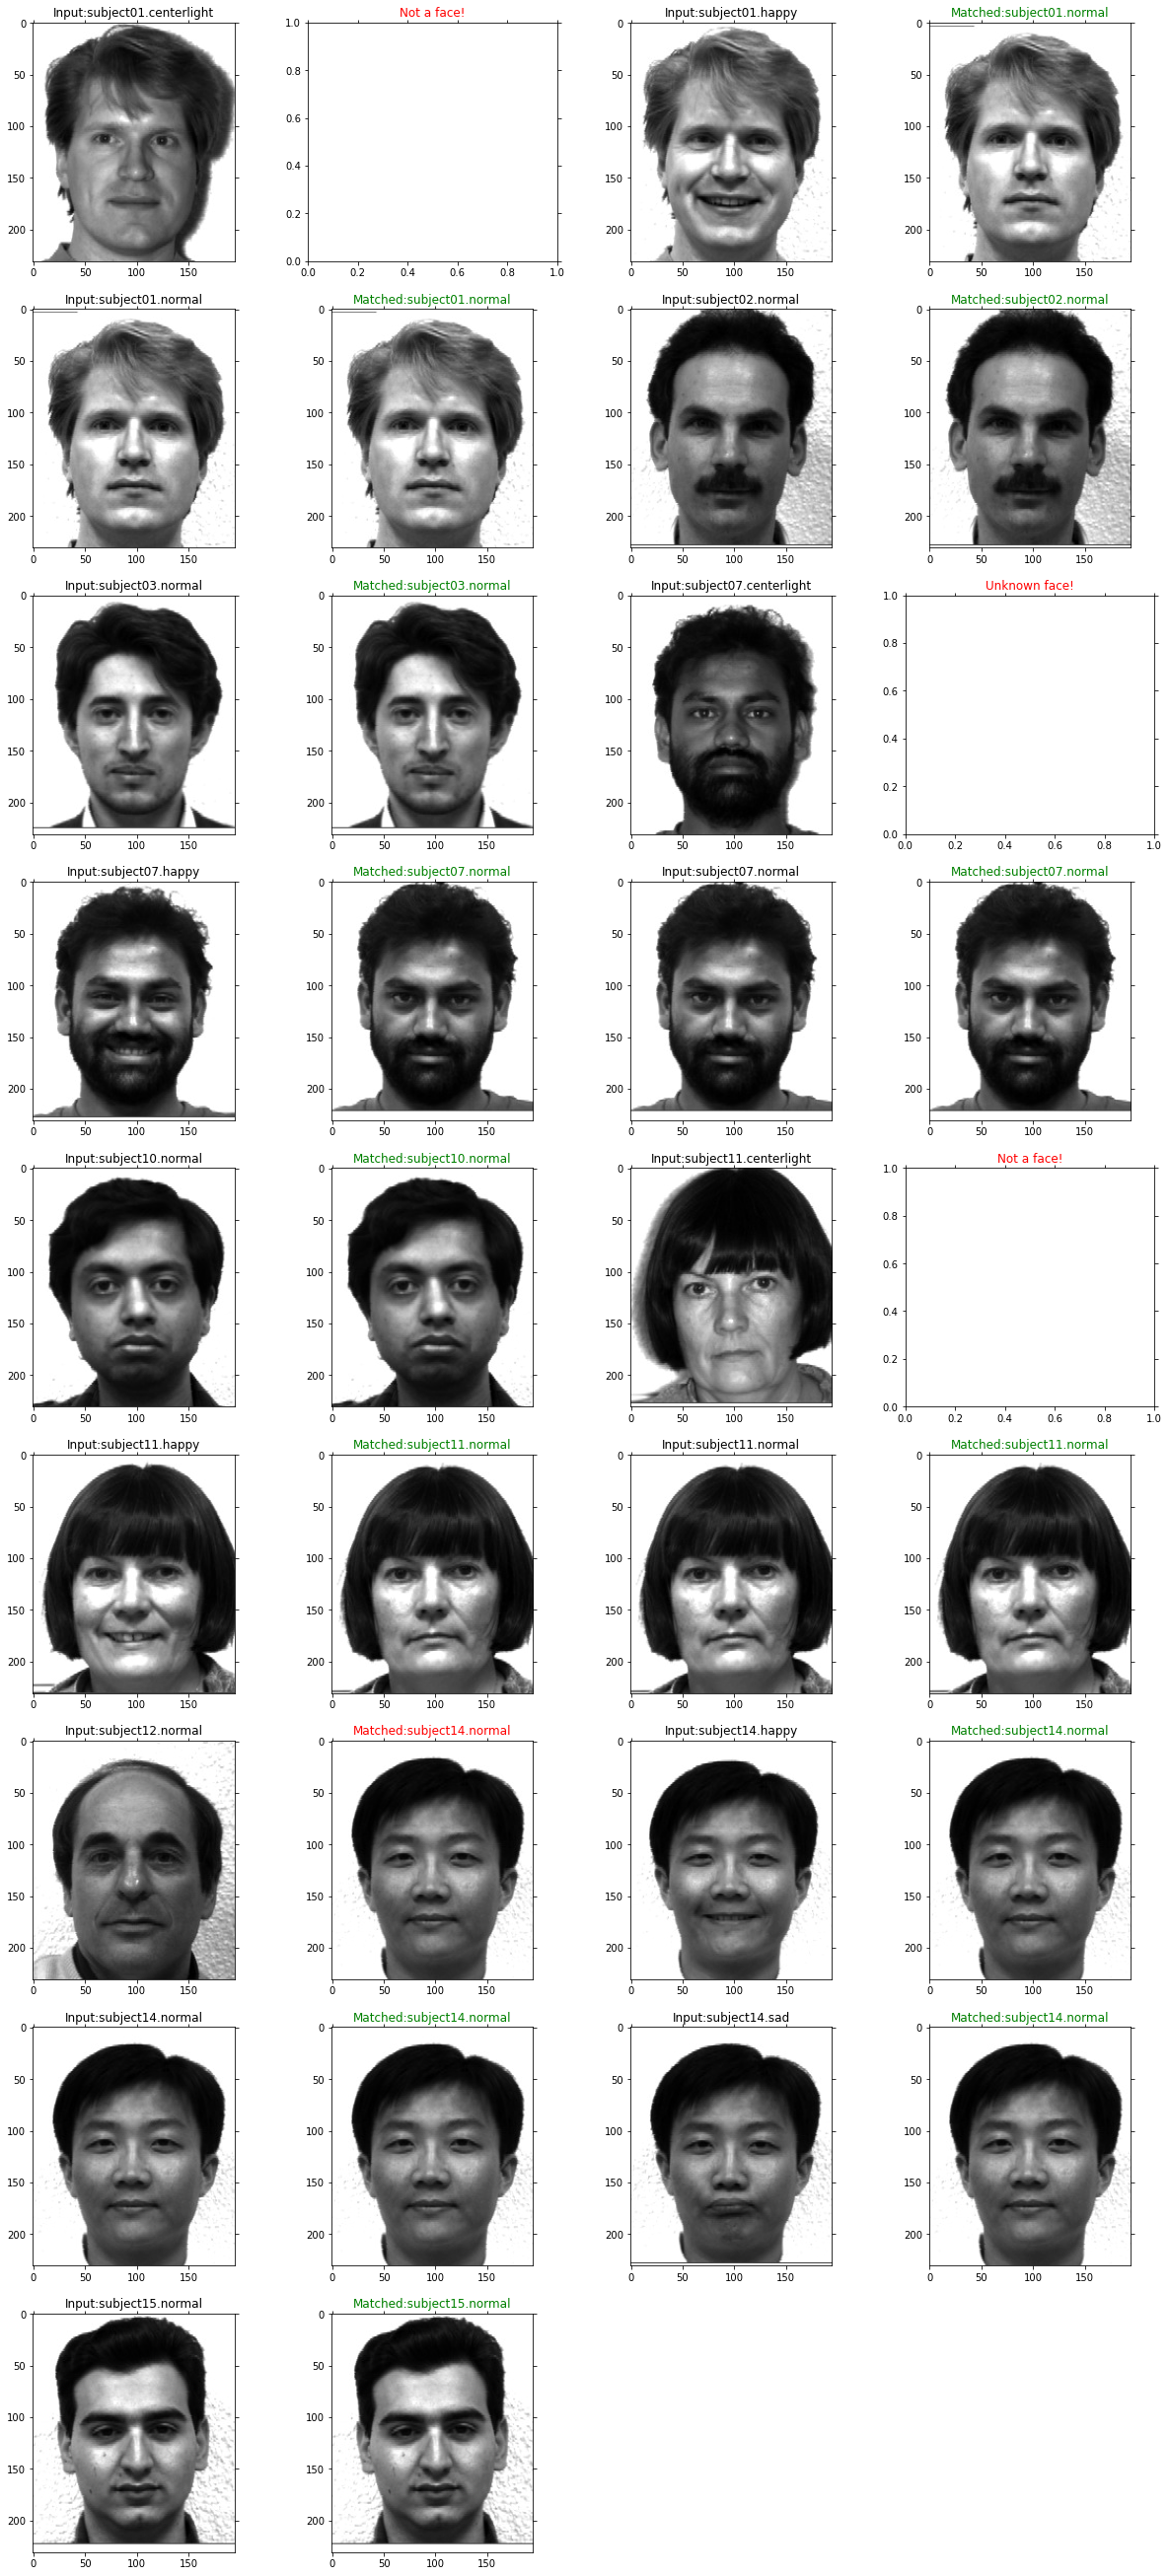

Correct predictions: 13/17 = 76.47058823529412%


In [30]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('Dataset/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

### Imágenes normalizadas

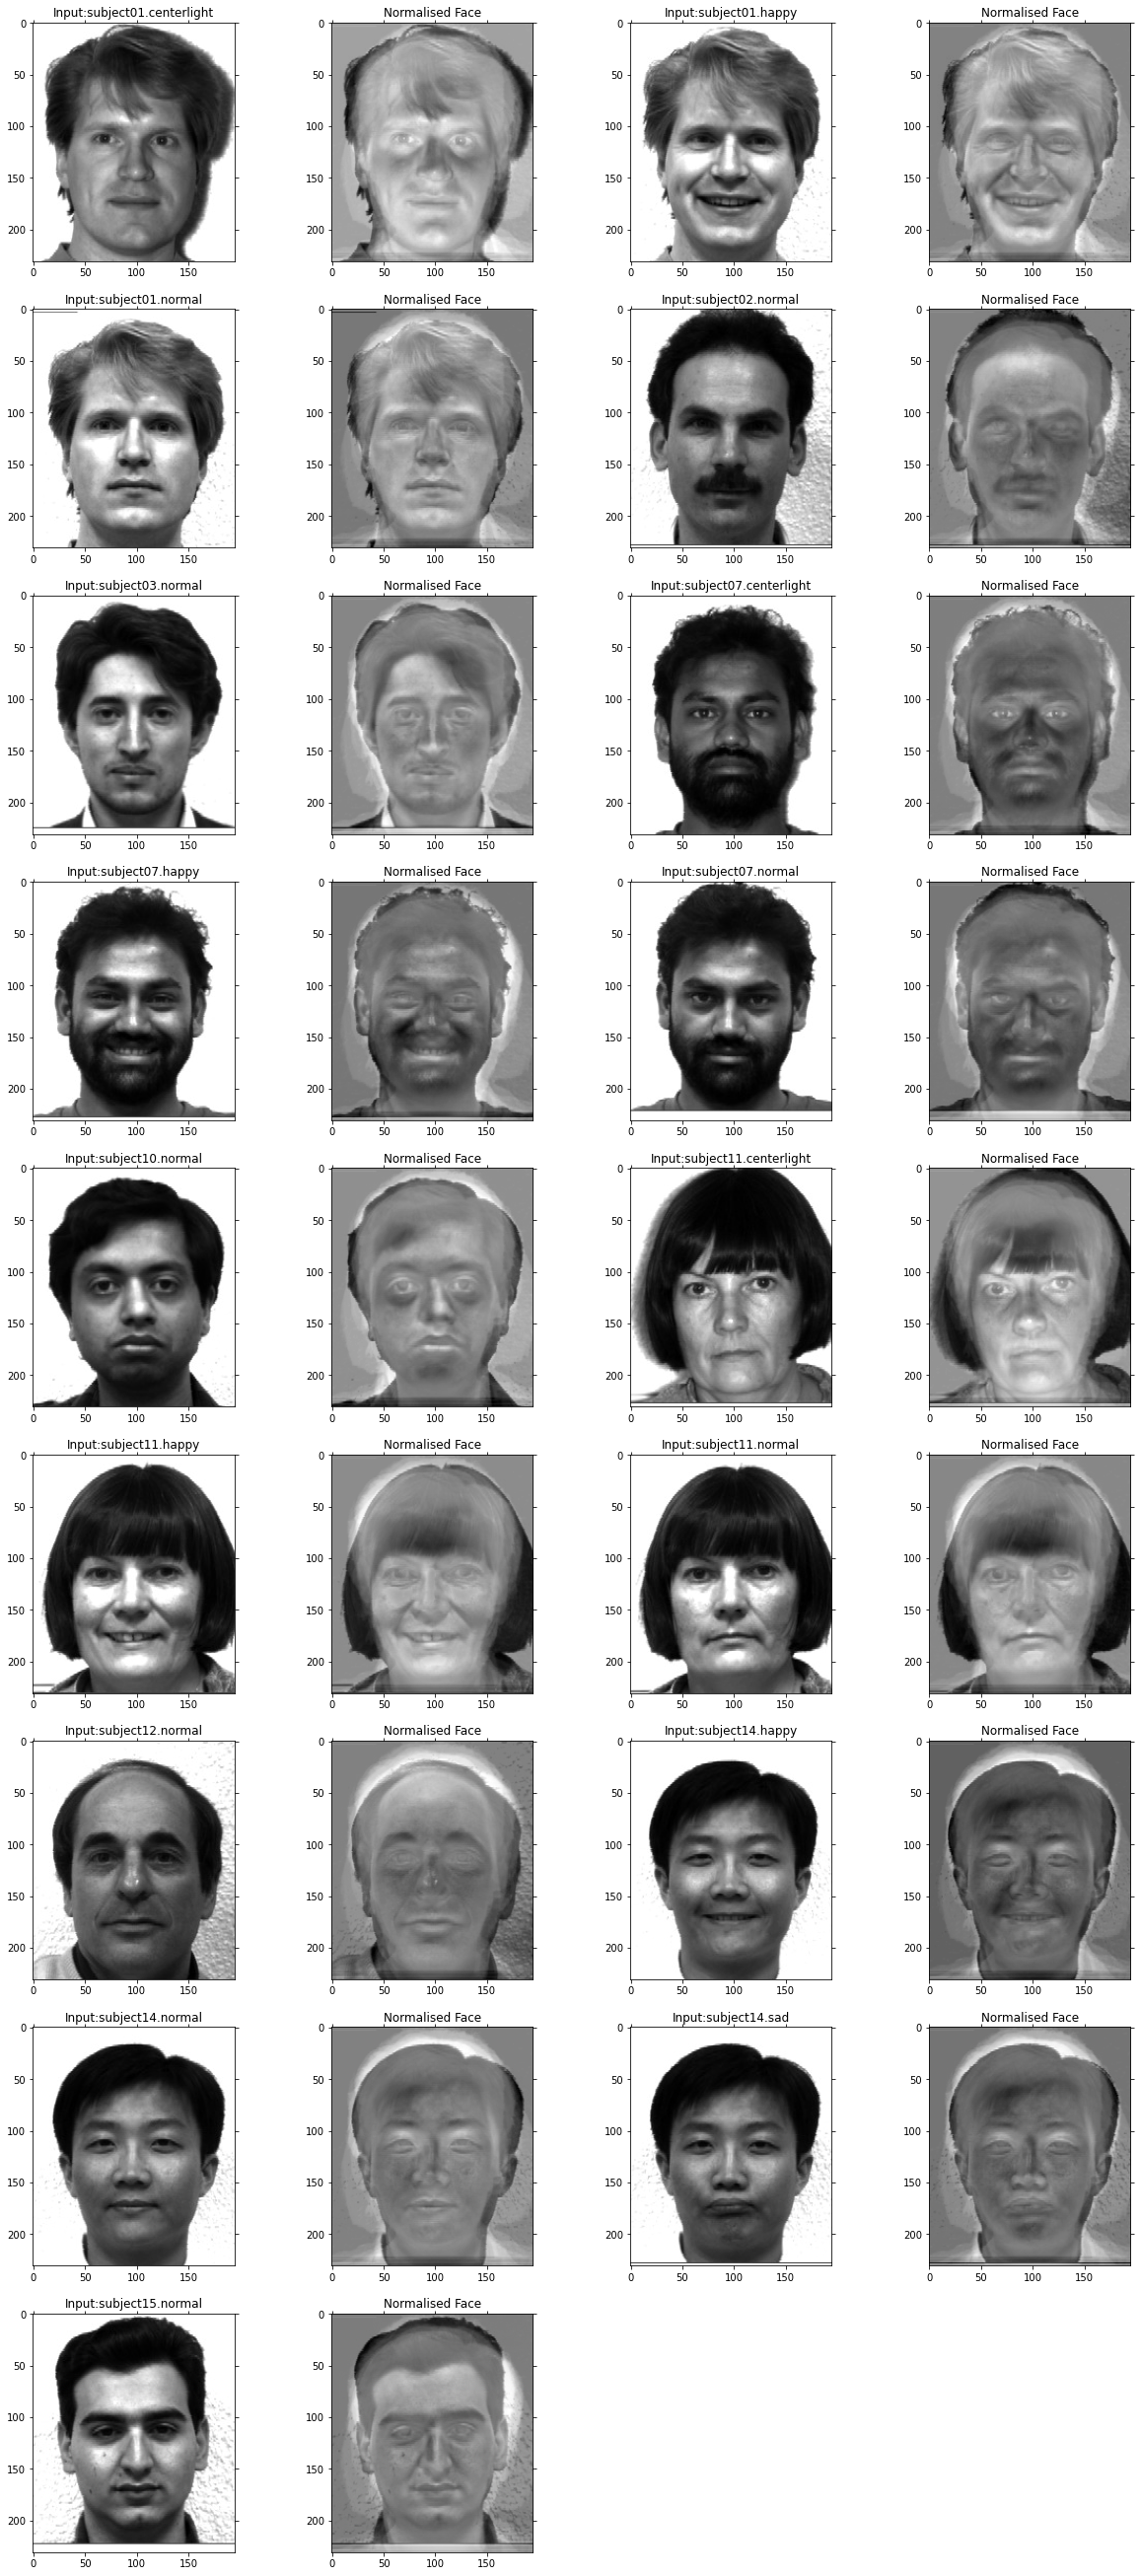

In [31]:
count        = 0
def recogniser(img, train_image_names,proj_data,w):
    global count
    unknown_face        = plt.imread('Dataset/'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    plt.subplot(9,4,1+count)
    plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
    plt.title('Normalised Face')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()